In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("insurance_pre.csv")

In [3]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [4]:
dataset['sex'] = dataset['sex'].apply(lambda x: 1.0 if x == 'male' else 0.0)
dataset['smoker'] = dataset['smoker'].apply(lambda x: 1.0 if x == 'yes' else 0.0)

In [5]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [6]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,0.0,27.900,0,1.0,16884.92400
1,18,1.0,33.770,1,0.0,1725.55230
2,28,1.0,33.000,3,0.0,4449.46200
3,33,1.0,22.705,0,0.0,21984.47061
4,32,1.0,28.880,0,0.0,3866.85520
...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,10600.54830
1334,18,0.0,31.920,0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,1629.83350
1336,21,0.0,25.800,0,0.0,2007.94500


In [7]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [8]:
independent=dataset[['age', 'bmi', 'children', 'sex', 'smoker']]

In [9]:
dependent=dataset[["charges"]]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size = 0.30, random_state = 0)

In [11]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='friedman_mse', splitter='best', max_features='sqrt')
regressor=regressor.fit(X_train,y_train)

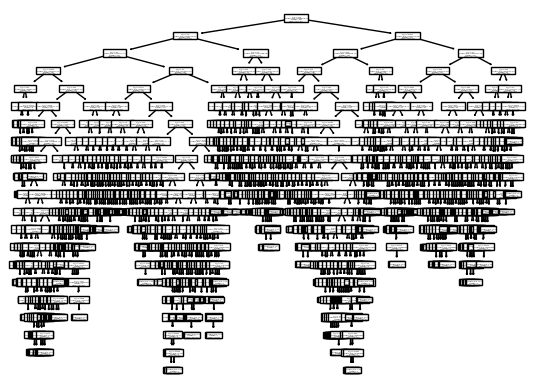

In [12]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [13]:
y_pred=regressor.predict(X_test)

In [14]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [15]:
r_score

0.7040278462033174